In [3]:
import pandas as pd
import numpy as np
import seaborn as sb

In [4]:
df = pd.read_csv("./data.csv")

In [5]:
# Рассчитаем мат. ожидание, дисперсию, медиану и распределение по процентилям параметров:

indicators = [
    ['Radius:', 'radius_mean'],
    ['Texture:', 'texture_mean'],
    ['Perimeter:', 'perimeter_mean'],
    ['Area:', 'area_mean'],
    ['Concavity:', 'concavity_mean'],
    ['Concave points:', 'concave points_mean'],
    ['Smoothness:', 'smoothness_mean'],
    ['Symmetry:', 'symmetry_mean'],
    ['Fractial dimmension:', 'fractal_dimension_mean']
]

valuesToPlot = [[], [], [], [], [], [], [], [], []]
i = 0
for indicator in indicators:
    label = indicator[0]
    key = indicator[1]
    print(label)
    values = df.loc[:, key]
    valuesToPlot[i] = values
    i = i + 1
    mean = values.mean()
    std = values.std()
    median = values.median()
    perecntile_25 = np.percentile(values, 25)
    perecntile_75 = np.percentile(values, 75)

    print("Мат. ожидание: ", mean)
    print("Дисперсия: ", std)
    print("Медиана: ", median)
    print("25-ый персцентиль: ", perecntile_25)
    print("75-ый персцентиль: ", perecntile_75)
    print("\n\n")





Radius:
Мат. ожидание:  14.127291739894552
Дисперсия:  3.524048826212078
Медиана:  13.37
25-ый персцентиль:  11.7
75-ый персцентиль:  15.78



Texture:
Мат. ожидание:  19.289648506151142
Дисперсия:  4.301035768166949
Медиана:  18.84
25-ый персцентиль:  16.17
75-ый персцентиль:  21.8



Perimeter:
Мат. ожидание:  91.96903339191564
Дисперсия:  24.2989810387549
Медиана:  86.24
25-ый персцентиль:  75.17
75-ый персцентиль:  104.1



Area:
Мат. ожидание:  654.8891036906855
Дисперсия:  351.9141291816527
Медиана:  551.1
25-ый персцентиль:  420.3
75-ый персцентиль:  782.7



Concavity:
Мат. ожидание:  0.0887993158172232
Дисперсия:  0.0797198087078935
Медиана:  0.06154
25-ый персцентиль:  0.02956
75-ый персцентиль:  0.1307



Concave points:
Мат. ожидание:  0.04891914586994728
Дисперсия:  0.03880284485915359
Медиана:  0.0335
25-ый персцентиль:  0.02031
75-ый персцентиль:  0.074



Smoothness:
Мат. ожидание:  0.0963602811950791
Дисперсия:  0.014064128137673616
Медиана:  0.09587
25-ый персцентиль:

In [6]:
# Нет смысла выводить гистограммы распределения на одном канвасе, т. к. мат. ожидания разных метрик соответствуют 
# разным элементам выборки 

<Axes: xlabel='radius_mean', ylabel='Count'>

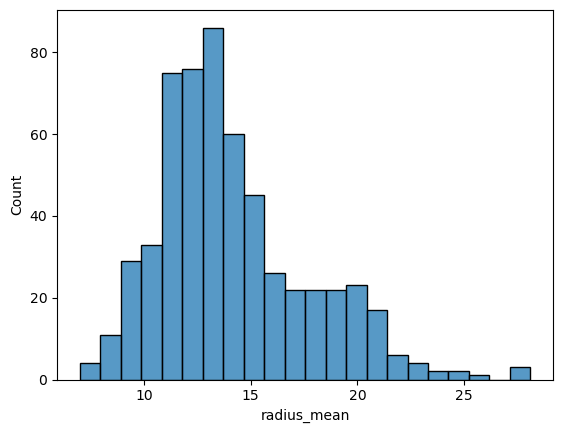

In [7]:
sb.histplot(valuesToPlot[0])

<Axes: xlabel='texture_mean', ylabel='Count'>

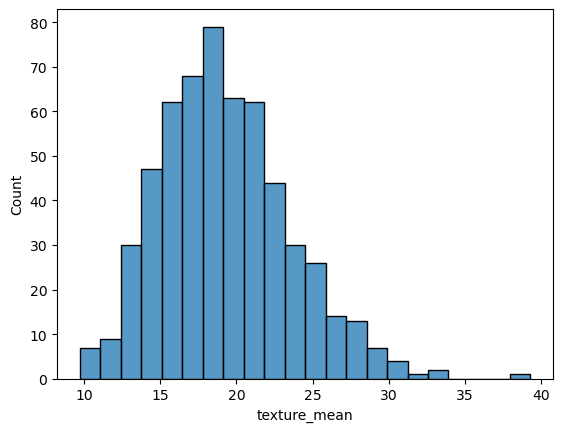

In [8]:
sb.histplot(valuesToPlot[1])

<Axes: xlabel='perimeter_mean', ylabel='Count'>

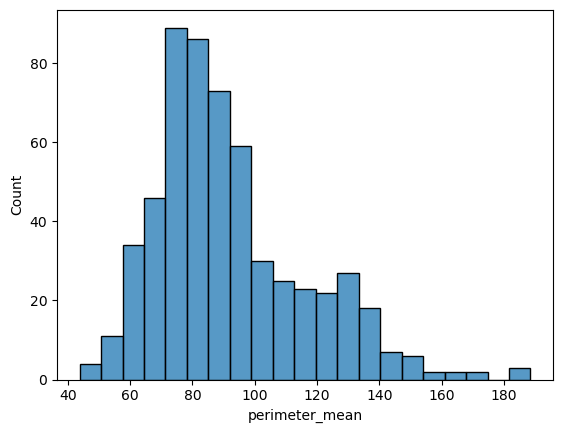

In [9]:
sb.histplot(valuesToPlot[2])

<Axes: xlabel='smoothness_mean', ylabel='Count'>

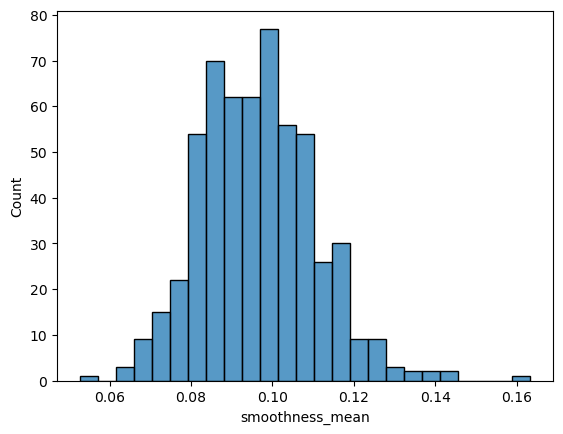

In [10]:
sb.histplot(valuesToPlot[6])

<Axes: xlabel='symmetry_mean', ylabel='Count'>

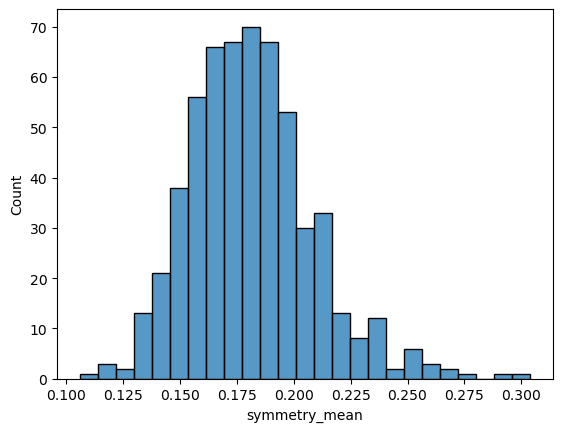

In [11]:
sb.histplot(valuesToPlot[7])

<Axes: xlabel='fractal_dimension_mean', ylabel='Count'>

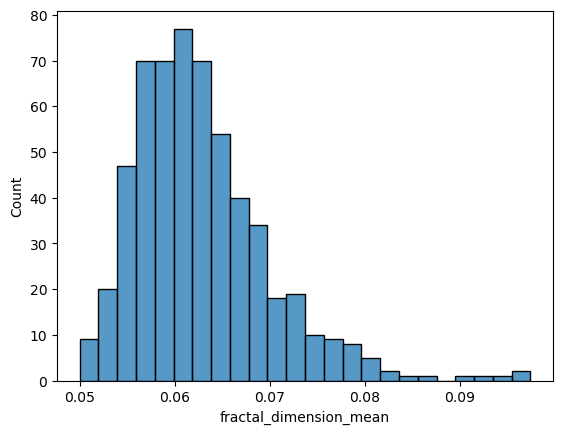

In [12]:
sb.histplot(valuesToPlot[8])

In [13]:
R1 = np.corrcoef(valuesToPlot)

<Axes: >

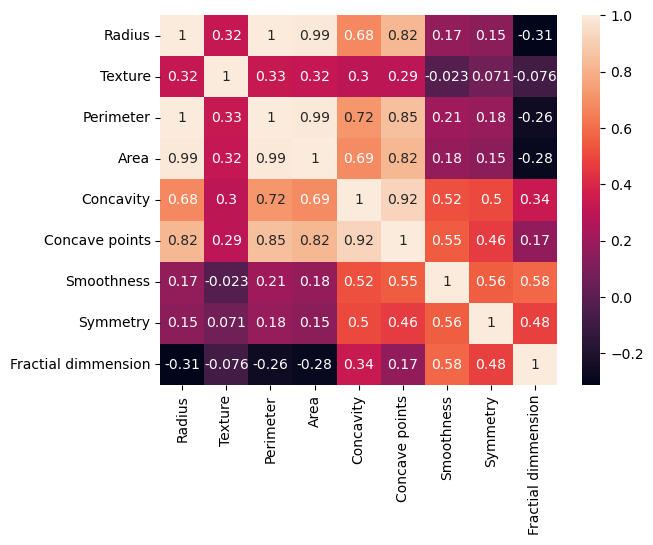

In [14]:
axis_labels = indicators = [
    'Radius',
    'Texture',
    'Perimeter',
    'Area',
    'Concavity',
    'Concave points',
    'Smoothness',
    'Symmetry',
    'Fractial dimmension',
]
sb.heatmap(R1, xticklabels = axis_labels, yticklabels = axis_labels, annot=True)

In [15]:
# Как и ожидалось исходя из геометрии, по heatmap также видно, что переметр и площадь абсолютно коррелированы с радиусом
# Поэтому имеет смысл из размеров брать только радиус.
# Так же, плохо корелированные параметры - это тектстура, мягкость, симметричность и concave points
# Итого, работаем со следующими параметрами: 'Radius', 'Texture', 'Concave points', 'Smoothness', 'Symmetry', 'Fractial dimmension'

In [16]:
# Согласно заданию, нужно сделать scatterplot для сильно скоррелированных параметров. 
# Сильнее всего скоррелированы радиус, перемитор и площадь. Но это объясняется школьным курсом геометрии, поэтому
# по ним нет смысла смотреть scatterplot

# Интересно посмотреть на зависимость Fraction demmension, Smootheness, Symmetry, Concave points
scp_data = df.loc[:, ['fractal_dimension_mean', 'symmetry_mean', 'smoothness_mean', 'concave points_mean']] 

<Axes: >

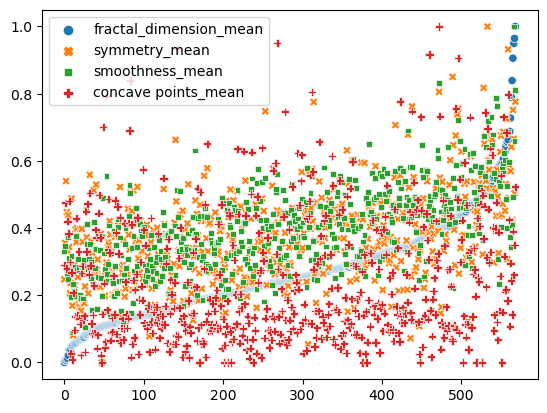

In [17]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Нужно привести данные параметров к едному масштабу, чтобы было удобно смотреть scatterplot
df_scaled = scaler.fit_transform(scp_data.to_numpy())


df_scaled = pd.DataFrame(df_scaled, columns=[
  'fractal_dimension_mean', 'symmetry_mean', 'smoothness_mean', 'concave points_mean'])

# Сортируем, чтобы корреляция была визуально заметнее
df_scaled = df_scaled.sort_values('fractal_dimension_mean', ignore_index=True)
sb.scatterplot(df_scaled)

In [18]:
# По scatterplot видна некоторая коррелция между frractial_dimensial, smootheness и symmetry. 
# Параметр concave points как буд-то сильно зашумлен

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_test_data = df.loc[:, ['diagnosis', 'fractal_dimension_mean', 'symmetry_mean', 'smoothness_mean', 'concave points_mean']] 
train, test = train_test_split(train_test_data, test_size = 0.3, shuffle = True)

In [20]:
# Стандартизируем данные, т.к.
# 1. Нужно привести к одним и тем же диапазонам, чтобы расстояния между соседями считались корректно (сбалансированно по всем параметрам)
# 2. Применяем StandardScaler потому что среди данных есть выбросы (судя по гистограммам и scatterplot-диаграмме)

train[['fractal_dimension_mean', 'symmetry_mean', 'smoothness_mean', 'concave points_mean']] = scaler.fit_transform(train[['fractal_dimension_mean', 'symmetry_mean', 'smoothness_mean', 'concave points_mean']])
test[['fractal_dimension_mean', 'symmetry_mean', 'smoothness_mean', 'concave points_mean']] = scaler.transform(test[['fractal_dimension_mean', 'symmetry_mean', 'smoothness_mean', 'concave points_mean']])




In [49]:
# Обучаем модель
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
X_train = train.loc[:, ['fractal_dimension_mean', 'symmetry_mean', 'smoothness_mean', 'concave points_mean']]
Y_train = train.loc[:, ['diagnosis']]
X_test = test.loc[:, ['fractal_dimension_mean', 'symmetry_mean', 'smoothness_mean', 'concave points_mean']]
Y_test = test.loc[:, ['diagnosis']].values.ravel()
knn.fit(X_train, Y_train.values.ravel())
Y_preds = knn.predict(X_test)

In [65]:
# Считаем метрики
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

accuracy = accuracy_score(Y_test, Y_preds)
print("accuracy: ", accuracy)

recall = recall_score(Y_test, Y_preds, average='macro')
print("recall: ", recall)

f1_score = f1_score(Y_test, Y_preds, average='macro')
print("f1_score: ", f1_score)

precision = precision_score(Y_test, Y_preds, average='macro')
print("precision: ", precision)


accuracy:  0.935672514619883
recall:  0.9308414043583535
f1_score:  0.9291178354749972
precision:  0.9274774774774774
